In [1]:
# Elaborar un modelo predictivo utilizando redes neuronales en
# Python para resolver un problema de aprendizaje de máquina.

# Ejercicio Guiado: Clasificación de prendas de vestir

# La empresa Mnist Fashion cuenta con 60.000 imágenes para ser entrenadas y
# cuenta con otras 10.000 imágenes que sirven para evaluar la precisión de
# nuestro modelo en clasificar las prendas, cabe resaltar que todas las imágenes
# están con una dimensión de 28 por 28px y tenemos 10 tipos de clases de ellas,
# donde podemos encontrar abrigos, poleras, zapatillas, tacones, entre otros.



In [2]:
# 1. Instale el ambiente de Tensorflow

# pip install tensorflow


In [3]:
# 2. Carga de la data
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from keras.utils import to_categorical
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Model

from sklearn.preprocessing import MinMaxScaler
#from github
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split





# Cargamos la data
data = keras.datasets.fashion_mnist

# Cargamos la data
#(train_images, train_labels), (test_images, test_labels) = data.load_data()
(train_images, train_labels), (test_images, test_labels) = data.load_data()

class_names = ["Camiseta", "Pantalón", "Suéter", "Vestido", "Abrigo", "Sandalia", "Camisa", "Zapatilla deportiva", "Bolso", "Botines"]


Cantidad de registros de entrenamiento:  60000
Cantidad de registros de prueba:  10000
Cantidad de atributos:  (60000, 28, 28)
Tipo de datos de los atributos:  uint8
Tipo de datos de las etiquetas:  uint8
Valores únicos de las etiquetas:  [0 1 2 3 4 5 6 7 8 9]
Cantidad de imágenes para entrenamiento:  60000


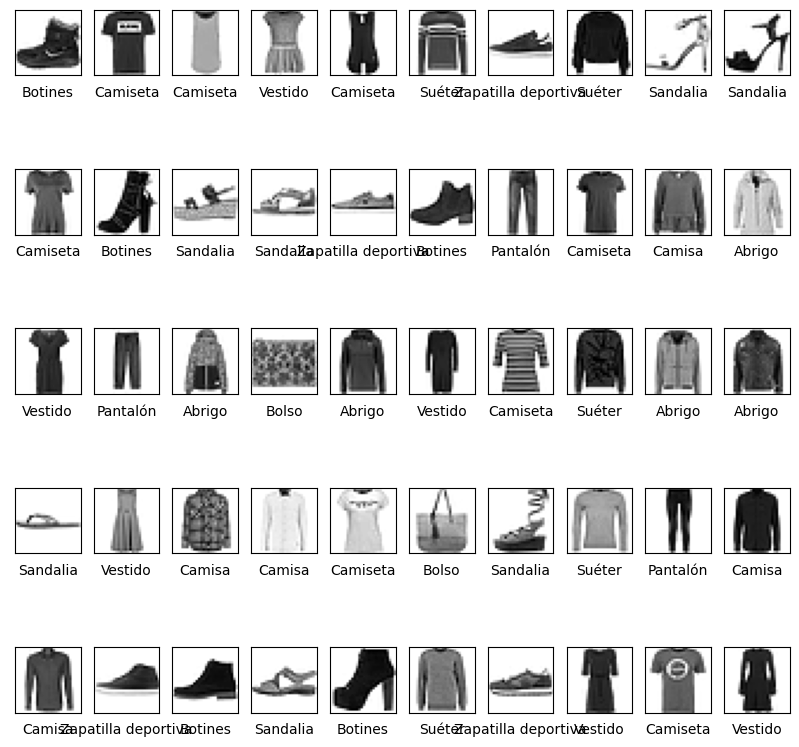

In [4]:
# 3. Descripción de la base de datos


# 3.1. Cantidad de registros
print("Cantidad de registros de entrenamiento: ", len(train_images))
print("Cantidad de registros de prueba: ", len(test_images))

# 3.2. Cantidad de atributos
print("Cantidad de atributos: ", train_images.shape)

# 3.3. Tipo de datos de los atributos
print("Tipo de datos de los atributos: ", train_images.dtype)

# 3.4. Tipo de datos de las etiquetas
print("Tipo de datos de las etiquetas: ", train_labels.dtype)

# 3.5. Valores únicos de las etiquetas
print("Valores únicos de las etiquetas: ", np.unique(train_labels))

print("Cantidad de imágenes para entrenamiento: ", len(train_images))
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [5]:
# 4. Configuración de la red neuronal

# 4.1. Normalización de los datos


train_images = train_images / 255.0 
test_images = test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


# Nota Importante: 
# train_images se divide entre 255.0 para que los valores estén entre 0 y 1.
# Hacer esto hace que sea más fácil para la red neuronal aprender.


# 4.2. Definición de la red neuronal



In [6]:
# Add a channel dimension, and scale features to be in [0, 1]
train_images = np.expand_dims(train_images, axis=-1) / 16

print(train_images.shape)

input_layer = Input(shape=train_images.shape[1:])

# Convolutional layers
conv1 = Conv2D(8, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=3, activation='relu')(pool1)
flat = Flatten()(conv2)

# Fully connected layers
dense1 = Dense(128, activation='relu')(flat)
dense2 = Dense(64, activation='relu')(dense1)
output_layer = Dense(10, activation='softmax')(dense2)

model = Model(input_layer, output_layer)

(60000, 28, 28, 1)


In [7]:
# compilar 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 flatten (Flatten)           (None, 1936)              0         
                                                                 
 dense (Dense)               (None, 128)               247936    
                                                             

In [19]:
# entrenamiento 
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)
history1 = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), batch_size=12000)


Epoch 1/10
5/5 [==============================] - 4s 761ms/step - loss: 4.2831 - val_loss: 10.8186
Epoch 2/10
5/5 [==============================] - 4s 713ms/step - loss: 1.0118 - val_loss: 4.4490
Epoch 3/10
5/5 [==============================] - 3s 703ms/step - loss: 0.7876 - val_loss: 2.9242
Epoch 4/10
5/5 [==============================] - 4s 721ms/step - loss: 0.6306 - val_loss: 3.1120
Epoch 5/10
5/5 [==============================] - 4s 732ms/step - loss: 0.5704 - val_loss: 3.6414
Epoch 6/10
5/5 [==============================] - 3s 712ms/step - loss: 0.5220 - val_loss: 4.0242
Epoch 7/10
5/5 [==============================] - 3s 708ms/step - loss: 0.4827 - val_loss: 4.1275
Epoch 8/10
5/5 [==============================] - 3s 709ms/step - loss: 0.4491 - val_loss: 4.0796
Epoch 9/10
5/5 [==============================] - 3s 674ms/step - loss: 0.4255 - val_loss: 3.8978
Epoch 10/10
5/5 [==============================] - 3s 687ms/step - loss: 0.4067 - val_loss: 3.9511


In [ ]:
history2 = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels), batch_size=256)

Epoch 1/20
235/235 [==============================] - 6s 24ms/step - loss: 0.4876 - accuracy: 0.8188 - val_loss: 3.1976 - val_accuracy: 0.7475
Epoch 2/20
235/235 [==============================] - 5s 23ms/step - loss: 0.4240 - accuracy: 0.8500 - val_loss: 5.2441 - val_accuracy: 0.6439
Epoch 3/20
235/235 [==============================] - 5s 23ms/step - loss: 0.3840 - accuracy: 0.8624 - val_loss: 5.3190 - val_accuracy: 0.6529
Epoch 4/20
235/235 [==============================] - 5s 23ms/step - loss: 0.3589 - accuracy: 0.8727 - val_loss: 7.5836 - val_accuracy: 0.6052
Epoch 5/20
235/235 [==============================] - 5s 23ms/step - loss: 0.3410 - accuracy: 0.8771 - val_loss: 7.2210 - val_accuracy: 0.6083
Epoch 6/20
235/235 [==============================] - 5s 23ms/step - loss: 0.3227 - accuracy: 0.8838 - val_loss: 8.0815 - val_accuracy: 0.5892
Epoch 7/20
235/235 [==============================] - 5s 23ms/step - loss: 0.3081 - accuracy: 0.8889 - val_loss: 6.3417 - val_accuracy: 0.6203

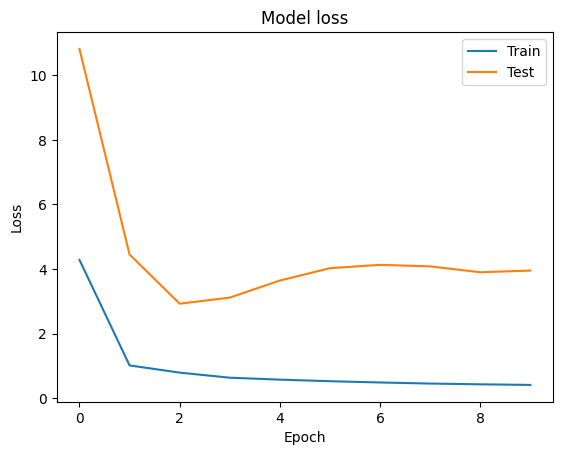

In [20]:
fig, ax = plt.subplots()
ax.plot(history1.history['loss'], label='Train')
ax.plot(history1.history['val_loss'], label='Test')
ax.set_title('Model loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

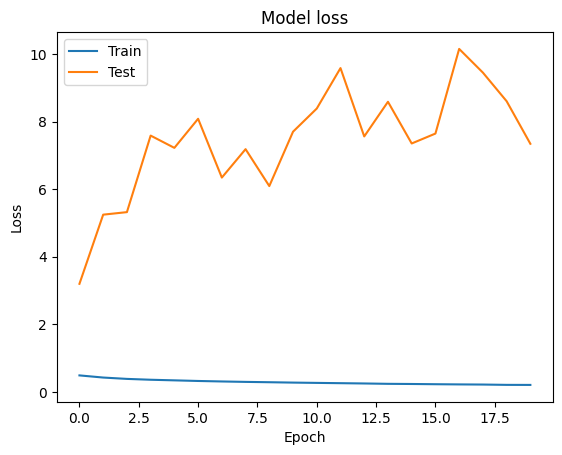

In [10]:
fig, ax = plt.subplots()
ax.plot(history2.history['loss'], label='Train')
ax.plot(history2.history['val_loss'], label='Test')
ax.set_title('Model loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

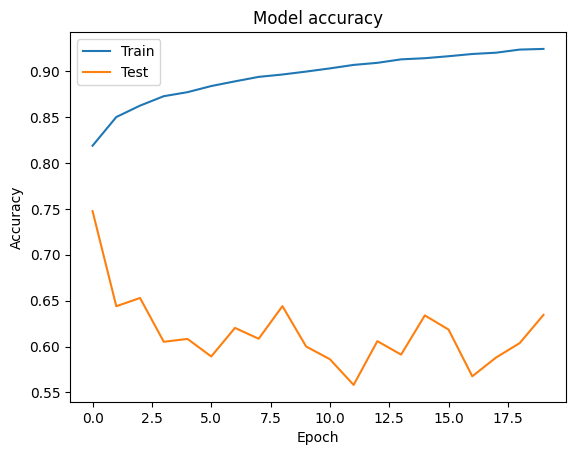

In [11]:
fig, ax = plt.subplots()
ax.plot(history2.history['accuracy'], label='Train')
ax.plot(history2.history['val_accuracy'], label='Test')
ax.set_title('Model accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()